In [1]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle

mpl.rc_file("matplotlibrc")
Path("plots").mkdir(exist_ok=True)

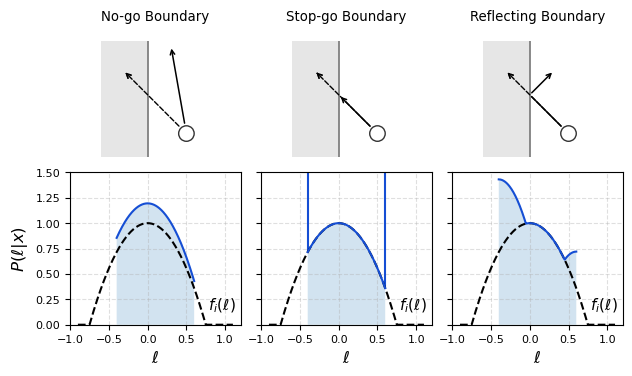

In [2]:
def fi(l, a, offset):
    x = l - offset
    return (
        np.heaviside(x + a, 0)
        * np.heaviside(a - x, 0)
        * (a - x)
        * (x + a)
        / (4.0 * a ** 3 / 3.0)
    )


xlim = (-1, 1)

titles = ("No-go Boundary", "Stop-go Boundary", "Reflecting Boundary")


xs_full = np.linspace(-0.5, 1.5, 200)
dx_full = xs_full[1] - xs_full[0]

xs_domain = np.linspace(0, 1, 200)
dx_domain = xs_domain[1] - xs_domain[0]

delta = 0.75
offset = 0.4

normz = np.sum([fi(x, delta, offset) for x in xs_domain]) * dx_domain

fig, axes = plt.subplots(2, 3, figsize=(6.3, 3.8), sharex=True, sharey="row")

# Visualise the boundary conditions.

# Rectangle height.
rect_h = 1.5
# Rectangle width.
w = 0.6
# Circle centre.
centre = [0.5, 0.3]
# Circle radius.
r = 0.1
# Dotted arrow length.
l = 1.05

for ax in axes[0]:
    ax.add_patch(Rectangle([-w, 0.0], w, rect_h, ec="none", fc="0.9"))
    ax.vlines(0, 0, rect_h, colors="0.5", lw=1.3)
    ax.add_patch(Circle(centre, r, ec="0.2", fc="none"))
    direction = (1 / 2 ** 0.5) * np.array([-1, 1])
    xytext = np.asarray(centre) + r * direction
    xy = xytext + l * direction
    ax.annotate(
        "", xy=xy, xytext=xytext, arrowprops=dict(arrowstyle="->", ls="--", lw=1)
    )
    # Plot a small solid arrow towards the end to avoid gaps in the arrowhead.
    ax.annotate(
        "",
        xy=xy,
        xytext=xytext + (l - 0.1) * direction,
        arrowprops=dict(arrowstyle="->", ls="-", lw=1),
    )

angle = 10 * np.pi / 180
direction2 = np.array([-np.sin(angle), np.cos(angle)])
xytext2 = np.asarray(centre) + r * direction2
xy2 = xytext2 + l * direction2

axes[0][0].annotate(
    "", xy=xy2, xytext=xytext2, arrowprops=dict(arrowstyle="->", ls="-", lw=1.1)
)

axes[0][1].annotate(
    "", xy=[0, 0.8], xytext=xytext, arrowprops=dict(arrowstyle="->", ls="-", lw=1.1)
)

direction3 = (1 / 2 ** 0.5) * np.array([1, 1])
xytext3 = np.array([0, 0.8])
# Draw the reflect arrow - just as long as the part of the dotted arrow within the
# boundary
xy3 = xytext3 + (l - np.linalg.norm(xytext - np.array([0, 0.8]))) * direction3

axes[0][2].annotate(
    "", xy=xy3, xytext=xytext3, arrowprops=dict(arrowstyle="->", ls="-", lw=1.1)
)
axes[0][2].annotate(
    "", xy=[0, 0.8], xytext=xytext, arrowprops=dict(ls="-", arrowstyle="-", lw=1.1)
)


# Plot the original and transformed distributions.

x = xs_full - offset
y = [fi(x, delta, offset) for x in xs_full]

x_d = xs_domain - offset
y_domain_data = [
    [fi(x, delta, offset) / normz for x in xs_domain],
    [fi(x, delta, offset) for x in xs_domain],
    [
        fi(x, delta, offset) + fi(-x, delta, offset) + fi(x, delta, 2 - offset)
        for x in xs_domain
    ],
]

line_c = "#154ed4"

for ax, y_d in zip(axes[1], y_domain_data):
    ax.plot(x, y, c="k", linestyle="--")
    ax.plot(x_d, y_d, c=line_c)
    ax.fill_between(x_d, y_d, 0, alpha=0.2)

# Plot the dirca deltas.
for i in (0, -1):
    axes[1][1].vlines(x_d[i], y_domain_data[1][i], 2, colors=line_c)

for ax in axes[1]:
    ax.set_xlabel("$\ell$")

axes[1][0].set_ylabel("$P(\ell|x)$")

for ax in axes.flatten():
    ax.set_xlim(*xlim)

for ax in axes[0]:
    ax.axis("off")
    ax.axis("scaled")
    ax.set_ylim(0, rect_h * 1.1)

for ax in axes[1]:
    ax.set_ylim(0, 1.5)
    # Add f_i label.
    ax.text(0.78, 0.15, r"$f_i(\ell)$", fontsize=11)

for ax, title in zip(axes[0], titles):
    ax.set_title(title)

fig.tight_layout()
fig.savefig((Path("plots") / "pdf_bc_case").with_suffix(".pdf"))